In [1]:
import urllib.parse
import pandas as pd
MARKET_CODE_DICT = {
    'kospi': 'stockMkt',
    'kosdaq': 'kosdaqMkt',
    'konex': 'konexMkt'
}
DOWNLOAD_URL = 'kind.krx.co.kr/corpgeneral/corpList.do'
def download_stock_codes(market=None, delisted=False):
    params = {'method': 'download'}

    if market.lower() in MARKET_CODE_DICT:
        params['marketType'] = MARKET_CODE_DICT[market]

    if not delisted:
        params['searchType'] = 13

    params_string = urllib.parse.urlencode(params)
    request_url = urllib.parse.urlunsplit(['http', DOWNLOAD_URL, '', params_string, ''])

    df = pd.read_html(request_url, header=0)[0]
    df.종목코드 = df.종목코드.map('{:06d}'.format)

    return df
kosdaq_stocks = download_stock_codes('kospi')
kosdaq_stocks


,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,GS글로벌,001250,상품 종합 도매업,"수출입업(시멘트,철강금속,전기전자,섬유,기계화학),상품중개,광업,채석업/하수처리 서...",1976-06-26,12월,김태형,http://www.gsgcorp.com,서울특별시
1,HSD엔진,082740,일반 목적용 기계 제조업,"대형선박용엔진,내연발전엔진",2011-01-04,12월,고영열,http://www.doosanengine.com,경상남도
2,KG케미칼,001390,기초 화학물질 제조업,"콘크리트혼화제, 비료, 친환경농자재, 수처리제",1989-08-25,12월,김경묵,http://www.kgchem.co.kr,울산광역시
3,LG이노텍,011070,전자부품 제조업,기타 전자부품 제조업,2008-07-24,12월,정철동,http://www.lginnotek.co.kr,서울특별시
4,OCI,010060,기초 화학물질 제조업,"타르제품,카본블랙,무수프탈산,농약원제,석탄화학제품,정밀화학제품,플라스틱창호재 제조,판매",1985-07-09,12월,"백우석, 이우현, 김택중(3인, 각자 대표이사)",http://www.oci.co.kr,서울특별시
5,SK네트웍스,001740,기타 전문 도매업,"종합무역업(전자전기제품,섬유,에너지화학제품,철강금속제품),의류,수입산합판,MDF판매...",1977-06-30,12월,"최신원, 박상규 (각자 대표이사)",http://www.sknetworks.co.kr,서울특별시
6,SK이노베이션,096770,석유 정제품 제조업,"석유정제,석유화학제품,윤활유제품,아스팔트제품,의약중간체 제조,판매,유전개발,대체에너지사업",2007-07-25,12월,김준,http://www.SKinnovation.com,서울특별시
7,STX,011810,상품 종합 도매업,"에너지 원료(석탄,석유),산업기자재(기계부품) 도매",1990-09-12,12월,박상준,http://www.stx.co.kr,경상남도
8,WISCOM,024070,플라스틱제품 제조업,"플라스틱제품(PVC컴파운드,ABS,PS가공) 제조,도매,임가공",1996-11-22,12월,구영일,http://www.wiscom.co.kr,경기도
9,갤럭시아에스엠,011420,스포츠 서비스업,"스포츠중계권,스포츠마케팅,광고",1989-11-14,12월,심우택,http://galaxiasme.com,서울특별시


In [2]:
stock = input("Enter a stock_name")

Enter a stock_name삼성전자


In [3]:
stock_codeDF = kosdaq_stocks[(kosdaq_stocks.회사명 == stock)][['회사명','종목코드']]
stock_codeDF

,회사명,종목코드
351,삼성전자,005930


In [4]:
stock_code = stock_codeDF.iloc[0]['종목코드']
stock_name = stock_codeDF.iloc[0]['회사명']
print(stock_name)
print(stock_code)

삼성전자
005930


Populating the interactive namespace from numpy and matplotlib


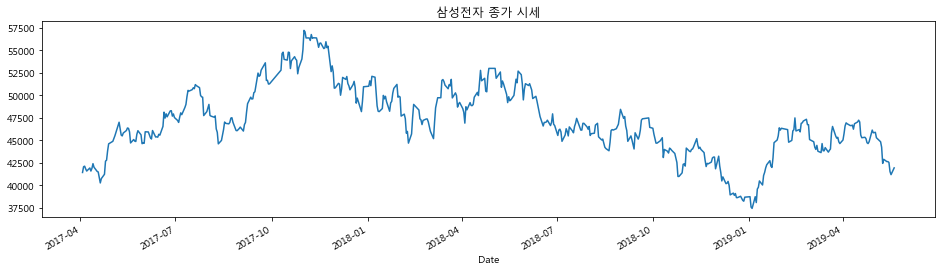

chart ok


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-05-14,41300,43100,41300,42650,11563730,0.000000
2019-05-15,42700,43050,42550,42550,7670185,-0.002345
2019-05-16,42350,42400,41350,41550,13687828,-0.023502
2019-05-17,41950,42050,40850,41200,13357951,-0.008424
2019-05-20,41650,42100,41550,41950,9699740,0.018204


In [5]:
import FinanceDataReader as web
from datetime import date, timedelta
import matplotlib.pyplot as plt
import datetime
#font setting for window
#font setting for mac (AppleGothic)
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 4) 

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

end = date.today()
#start = date.today() - timedelta(14)
start = datetime.datetime(2017,4,1) #date.today() - timedelta(1)
#print(yesterday)

SEC = web.DataReader(stock_code, start, end)
SEC['Close'].plot(style='-')
plt.title(stock_name+" 종가 시세")
plt.show()

print("chart ok")
SEC.tail()

In [23]:
#import numpy as np
#SEC =  web.get_data_yahoo("005490.KS", start_past, end)
SEC["20d"] = np.round(SEC["Close"].rolling(window = 20, center = False).mean(), 2)
 
#pandas_candlestick_ohlc(SEC.loc[start:end,:], otherseries = "20d")

In [24]:
SEC["50d"] = np.round(SEC["Close"].rolling(window = 50, center = False).mean(), 2)
SEC["200d"] = np.round(SEC["Close"].rolling(window = 200, center = False).mean(), 2)
SEC['20d-50d'] = SEC['20d'] - SEC['50d']
SEC.tail()

,Open,High,Low,Close,Volume,Change,20d,50d,200d,20d-50d
Date,,,,,,,,,,
2019-05-09,176000,177000,169000,169000,296691,-0.039773,186000.0,187270.0,192815.0,-1270.0
2019-05-10,170500,172500,169000,170500,183947,0.008876,185325.0,187060.0,192707.5,-1735.0
2019-05-13,168000,171500,167500,167500,146511,-0.017595,184425.0,186650.0,192552.5,-2225.0
2019-05-14,166500,167000,164000,166000,231350,-0.008955,183475.0,186210.0,192417.5,-2735.0
2019-05-15,166500,173000,166000,170000,263664,0.024096,182300.0,185940.0,192310.0,-3640.0


                Open           High            Low          Close  \
count     515.000000     515.000000     515.000000     515.000000   
mean   191281.553398  193600.970874  188836.893204  191301.941748   
std     15536.618897   15886.620996   15185.512950   15591.283735   
min    155500.000000  157000.000000  154000.000000  156500.000000   
25%    181500.000000  183500.000000  179000.000000  181500.000000   
50%    194000.000000  196000.000000  191500.000000  193500.000000   
75%    203500.000000  206000.000000  201000.000000  203500.000000   
max    226000.000000  227000.000000  221500.000000  225500.000000   

              Volume      Change            20d            50d           200d  \
count     515.000000  515.000000     496.000000     466.000000     316.000000   
mean   242063.106796    0.000188  192109.879032  193045.622318  197438.061709   
std    100546.808118    0.017184   14316.233570   13025.648187    5118.250637   
min     59967.000000   -0.069307  158375.000000  16371

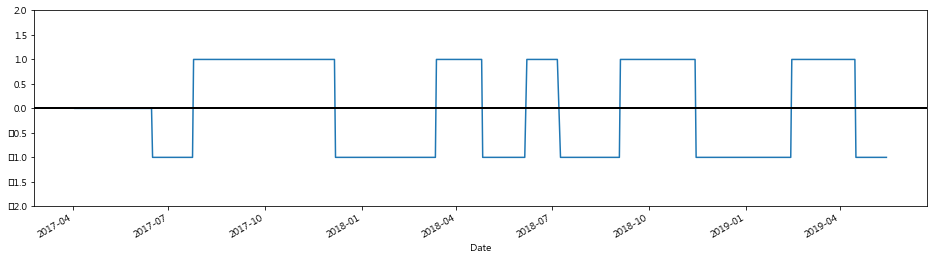

In [30]:
# np.where() is a vectorized if-else function, where a condition is checked for each component of a vector, and the first argument passed is used when the condition holds, and the other passed if it does not
SEC["Regime"] = np.where(SEC['20d-50d'] > 0, 1, 0)
# We have 1's for bullish regimes and 0's for everything else. Below I replace bearish regimes's values with -1, and to maintain the rest of the vector, the second argument is apple["Regime"]
SEC["Regime"] = np.where(SEC['20d-50d'] < 0, -1, SEC["Regime"])
print(SEC.describe())
SEC.loc[start:end,"Regime"].plot(ylim = (-2,2)).axhline(y = 0, color = "black", lw = 2)